In [300]:
pip install opendatasets

## Download dataset

In [301]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/joebeachcapital/restaurant-reviewshttps://www.kaggle.com/datasets/joebeachcapital/restaurant-reviews")

## Load dataset

In [302]:
import pandas as pd

In [303]:
df_reviews = pd.read_csv("/content/restaurant-reviews/Restaurant reviews.csv")

## Data study

In [304]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
#first 5 records
df_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [306]:
#last 5 records
df_reviews.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,NaN
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,NaN
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,NaN
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,NaN
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6,NaN


In [307]:
#Some df informations
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [308]:
# rating unique values
df_reviews['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [309]:
#check how many Like ratings
df_reviews.loc[df_reviews['Rating']=='Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1,NaN


In [310]:
#check for null values
df_reviews.isnull().sum()

Restaurant       0
Reviewer        38
Review          45
Rating          38
Metadata        38
Time            38
Pictures         0
7514          9999
dtype: int64

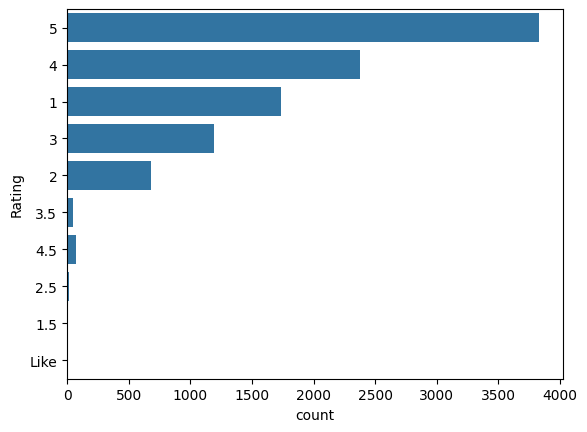

In [311]:
#class balance
plt.figure()
sns.countplot(df_reviews['Rating'])
plt.show()

In [312]:
#shuffling data
df_reviews = df_reviews.sample(frac=1)

In [313]:
#visualizing some random samples
random_idx=random.randint(0,len(df_reviews)-10)
for _,review,rating in df_reviews[['Review','Rating']][random_idx:random_idx+10].itertuples():
  print(f'Review text:{review}\nRating:{rating}\n\n')

Review text:This place is an amazing experience to refresh your taste buds. Mostly serves cakes pieces, snacks and juices/shakes, etc. but never fails to amaze you. It has good seating space and the staff seems to be courteous and does explain you in case of any questions and confusions. They even serve eggless products for the vegetarians. The place is located on the old Mumbai Highway and is a little ahead opposite of the Care hospitals in the area. The restaurant has decent parking space as well.
Rating:4


Review text:Very happy with service provided by Nilak das.... happy go Lucky person...
Will visit just for his service and awsam food served by him i am happy with all
Rating:5


Review text:If u r looking for a place to chill and relax, this is the place. Fruit juices are fresh. Ordered bombay sandwich which was worth the money. Ambience is nice and service too. Overall
Food - 4
Ambience - 4
Service - 4
Can be re-visited- Yes
Rating:4


Review text:Though the ambience and food w

## Data preprocessing

In [314]:
# Selecting columns to use
df = df_reviews[['Review','Rating']]

In [315]:
# dropping null values
df.dropna(inplace=True)
df.reset_index(drop=True)

<ipython-input-315-03cfe20199ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Review,Rating
0,Nice and friendly place. Food was tasty and de...,4
1,Went there for team lunch last week. From the ...,3
2,"We went with a lot of hopes, but were disappoi...",1
3,"Awesome place !!!\n\n1. Good ambiance,\n2. Gre...",4
4,Good place and wonderful ambience staff was ve...,5
...,...,...
9950,awesome awesome awesome,5
9951,This place is outstanding and every time I nee...,5
9952,delivered on time,5
9953,liked the food. thanks for suggesting #KhaoPha...,4


In [316]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [317]:
# dropping record with rating equal to 'Like'
index_to_drop = df.loc[df['Rating']=='Like'].index
df.drop(index_to_drop,inplace=True)
df.reset_index(drop=True)

<ipython-input-317-7dfbdf7b7548>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index_to_drop,inplace=True)


,Review,Rating
0,Nice and friendly place. Food was tasty and de...,4
1,Went there for team lunch last week. From the ...,3
2,"We went with a lot of hopes, but were disappoi...",1
3,"Awesome place !!!\n\n1. Good ambiance,\n2. Gre...",4
4,Good place and wonderful ambience staff was ve...,5
...,...,...
9949,awesome awesome awesome,5
9950,This place is outstanding and every time I nee...,5
9951,delivered on time,5
9952,liked the food. thanks for suggesting #KhaoPha...,4


In [318]:
df.loc[df['Rating']=='Like']

,Review,Rating


In [319]:
# casting rating column datatype
df['Rating'] = df['Rating'].astype('float')

<ipython-input-319-4ec22b308d41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'] = df['Rating'].astype('float')


In [320]:
## Assign Positive to values between 4 and 5, Neutral to values between 3 and 4, negative to values below 3

df.replace([3.5,4,4.5,5],'Positive', inplace=True)
df.replace([1,1.5,2,2.5,3],'Negative', inplace=True)

<ipython-input-320-fcac3c862bf3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([3.5,4,4.5,5],'Positive', inplace=True)
<ipython-input-320-fcac3c862bf3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([1,1.5,2,2.5,3],'Negative', inplace=True)


In [321]:
df['Rating'].unique()

array(['Positive', 'Negative'], dtype=object)

In [322]:
df.head()

,Review,Rating
890,Nice and friendly place. Food was tasty and de...,Positive
5160,Went there for team lunch last week. From the ...,Negative
6037,"We went with a lot of hopes, but were disappoi...",Negative
1160,"Awesome place !!!\n\n1. Good ambiance,\n2. Gre...",Positive
3061,Good place and wonderful ambience staff was ve...,Positive


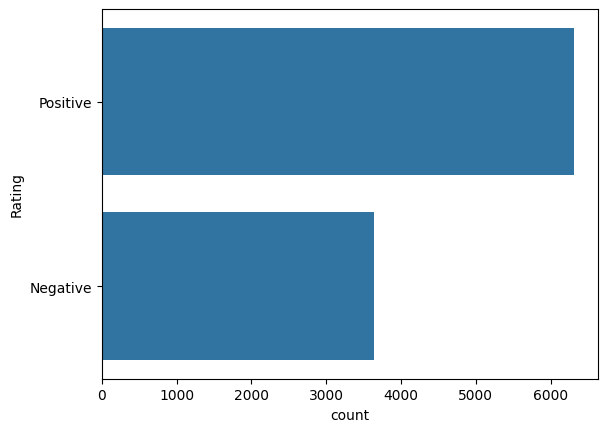

In [323]:
plt.figure()
sns.countplot(df['Rating'])
plt.show()

## Splitting data into training and test sets

In [324]:
from sklearn.model_selection import train_test_split

In [325]:
X_train,X_test,y_train,y_test=train_test_split(df[['Review']].to_numpy(),df['Rating'].to_numpy(),
                                               test_size=0.2,
                                               shuffle=True,
                                               stratify=df['Rating'].to_numpy(),
                                               random_state=42)

In [326]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((7963, 1), (7963,), (1991, 1), (1991,))

# Running some experiments

###  **Model_0** : ConvolutionalNeuralNetwork model with sentence-level vectorization and embedding layers

#### Checking average tokens per sentence in training sentences

In [327]:
train_sentences=pd.DataFrame(X_train)
train_sentences = train_sentences[0].to_list()

In [328]:
sent_lengths = [len(i.split()) for i in train_sentences]
avg_sent_len = round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

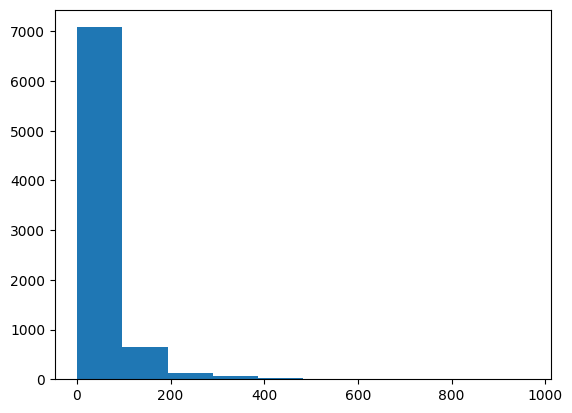

In [329]:
plt.hist(sent_lengths);

In [330]:
np.percentile(sent_lengths, 95)

148.0

In [331]:
op_seq_len = 148

#### How many different words in sentences ?

In [332]:
words = []
for sent in train_sentences:
  for token in sent.split():
    words.append(token.lower())
print(len(set(words)))

27684


#### Building text vectorization layer

In [333]:
from tensorflow.keras import layers

In [334]:
VOCAB_SIZE=len(set(words))
sentence_vectorizer = layers.TextVectorization(max_tokens=VOCAB_SIZE,
                                               output_sequence_length=op_seq_len,
                                               pad_to_max_tokens=True,name='sentence_vectorization_layer')

In [335]:
sentence_vectorizer.adapt(X_train)

In [336]:
print(f'5 Most common words:{sentence_vectorizer.get_vocabulary()[:5]}')
print(f'5 Least common words:{sentence_vectorizer.get_vocabulary()[-5:]}')

5 Most common words:['', '[UNK]', 'the', 'and', 'was']
5 Least common words:['055', '04', '03feb2019', '03am', '015']


In [337]:
random_sample = random.choice(train_sentences)
print(f'Original sentence:{random_sample}\nVectorizer form:{sentence_vectorizer([random_sample])}')

Original sentence:Love their chocolate brownies and red velvet cupcakes! They are pricier than your usual Baker’s confectionery, but they are totally worth it.
No trip to Hyderabad was ever complete without a visit to Labonel back when I didn’t live here. I am so glad they’ve expanded and started a branch in Gachibowli. I hope they start a delivery service soon.
Vectorizer form:[[  110    49   192   701     3   466  1034   853    21    27  3703   134
     76   742 16340  5371    22    21    27   383   138    13    70  1933
      5   129     4   170   783   362     6    61     5  1472   236    89
      9   729   307    43     9   168    41  2543  2113 14368     3   442
      6   757    16   185     9   520    21   543     6   133    24   402
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0  

#### Building embedding layers

In [338]:
sentence_embedding = layers.Embedding(input_dim=VOCAB_SIZE,
                                      output_dim=128,
                                      mask_zero=True,
                                      input_length=op_seq_len, name='sentence_embedding_layer')

In [339]:
print(f'Original text:{random_sample}\nEmbed form:{sentence_embedding(sentence_vectorizer([random_sample]))}')

Original text:Love their chocolate brownies and red velvet cupcakes! They are pricier than your usual Baker’s confectionery, but they are totally worth it.
No trip to Hyderabad was ever complete without a visit to Labonel back when I didn’t live here. I am so glad they’ve expanded and started a branch in Gachibowli. I hope they start a delivery service soon.
Embed form:[[[-0.03897738  0.02497054  0.00749592 ... -0.02775667 -0.0066931
   -0.04695665]
  [-0.00025705 -0.00044612 -0.01943584 ... -0.02723472  0.01630661
    0.01679358]
  [-0.03916961  0.03300471 -0.0394935  ...  0.00658784 -0.0196802
   -0.0253298 ]
  ...
  [ 0.00317119  0.02494344 -0.0458112  ...  0.04704605  0.03362909
    0.02292314]
  [ 0.00317119  0.02494344 -0.0458112  ...  0.04704605  0.03362909
    0.02292314]
  [ 0.00317119  0.02494344 -0.0458112  ...  0.04704605  0.03362909
    0.02292314]]]


#### Building model with Functional API

In [340]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model

In [341]:
num_classes = len(np.unique(y_train))
num_classes

2

In [342]:
inputs = layers.Input(shape=(1,), dtype=tf.string, name='input_layer')
vectorized_tokens = sentence_vectorizer(inputs)
embed_tokens = sentence_embedding(vectorized_tokens)
x = layers.Conv1D(128,2, activation='relu')(embed_tokens)
x = layers.GlobalAveragePooling1D(name='pooling_1d_layer')(x)
outputs = layers.Dense(1, activation='sigmoid',name='output_layer')(x)
model_0 = tf.keras.Model(inputs, outputs, name='sentence_conv1d_model')

In [343]:
##visualize model_0 summary
model_0.summary()

Model: "sentence_conv1d_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 sentence_vectorization_lay  (None, 148)               0         
 er (TextVectorization)                                          
                                                                 
 sentence_embedding_layer (  (None, 148, 128)          3543552   
 Embedding)                                                      
                                                                 
 conv1d_22 (Conv1D)          (None, 147, 128)          32896     
                                                                 
 pooling_1d_layer (GlobalAv  (None, 128)               0         
 eragePooling1D)                                                 
                                             

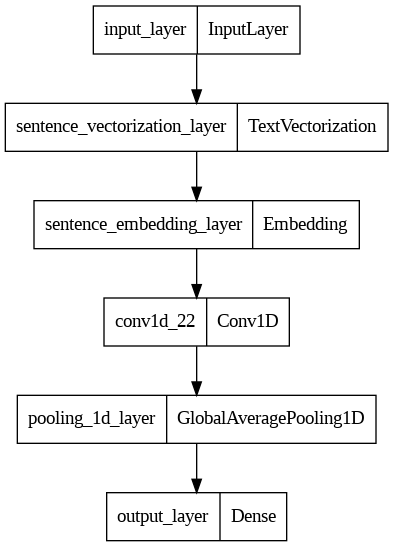

In [344]:
#model plot
plot_model(model_0)

In [345]:
## compile the model
model_0.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

#### Building train and test datasets with tf.data.Dataset

In [346]:
from tensorflow.data import Dataset
from sklearn.preprocessing import LabelEncoder

In [347]:
encoder = LabelEncoder()

In [348]:
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [349]:
train_sentences = Dataset.from_tensor_slices(X_train)
test_sentences = Dataset.from_tensor_slices(X_test)
train_labels = Dataset.from_tensor_slices(y_train_encoded)
test_labels = Dataset.from_tensor_slices(y_test_encoded)

In [350]:
train_dataset = Dataset.zip((train_sentences, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = Dataset.zip((test_sentences, test_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

#### Fitting model on sentence-level vectorization and embedding data

In [351]:
model_0_history = model_0.fit(train_dataset,
                              epochs=5,
                              steps_per_epoch=len(train_dataset),
                              validation_data=test_dataset,
                              validation_steps=int(0.15*len(test_dataset)))

Epoch 1/5
249/249 [==============================] - 36s 138ms/step - loss: 0.5091 - accuracy: 0.7540 - val_loss: 0.2973 - val_accuracy: 0.8958
Epoch 2/5
249/249 [==============================] - 20s 80ms/step - loss: 0.2801 - accuracy: 0.8936 - val_loss: 0.2415 - val_accuracy: 0.9236
Epoch 3/5
249/249 [==============================] - 20s 82ms/step - loss: 0.2024 - accuracy: 0.9248 - val_loss: 0.2373 - val_accuracy: 0.9167
Epoch 4/5
249/249 [==============================] - 20s 79ms/step - loss: 0.1522 - accuracy: 0.9468 - val_loss: 0.2505 - val_accuracy: 0.9132
Epoch 5/5
249/249 [==============================] - 20s 80ms/step - loss: 0.1184 - accuracy: 0.9593 - val_loss: 0.2708 - val_accuracy: 0.9097


#### Plotting Model_0 loss curves

In [352]:
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  epochs = range(len(loss))

  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='Train loss')
  plt.plot(epochs, val_loss, label='Val loss')
  plt.legend()
  plt.title('Loss')
  plt.subplot(1,2,2)
  plt.plot(epochs, acc, label='Train acc')
  plt.plot(epochs, val_acc, label='Val acc')
  plt.legend()
  plt.title('Accuracy')

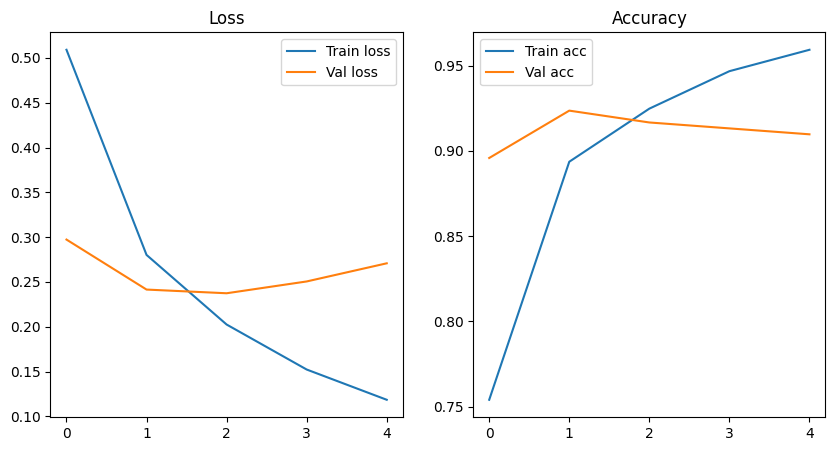

In [353]:
plot_loss_curves(model_0_history)

####Evaluate model_0

In [354]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report

In [355]:
## making some predictions
y_pred_probs = model_0.predict(test_dataset)
y_pred = tf.squeeze(tf.round(y_pred_probs))

63/63 [==============================] - 1s 10ms/step


Accuracy_score:88.45%


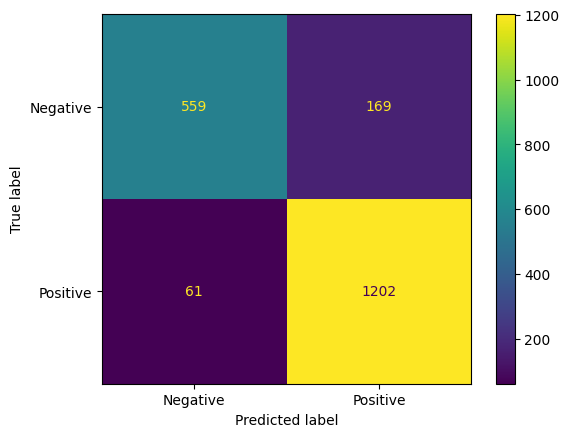

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       728
           1       0.88      0.95      0.91      1263

    accuracy                           0.88      1991
   macro avg       0.89      0.86      0.87      1991
weighted avg       0.89      0.88      0.88      1991



In [381]:
print(f'Accuracy_score:{accuracy_score(y_test_encoded,y_pred)*100:.2f}%')
cm = confusion_matrix(y_test_encoded,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['Negative','Positive'])
disp.plot()
plt.show()
print(classification_report(y_test_encoded, y_pred))

###  **Model_1** : ConvolutionalNeuralNetwork model with sentence-level + character-level vectorization and embedding layers

In [357]:
train_sentences = pd.DataFrame(X_train)
test_sentences = pd.DataFrame(X_test)

In [358]:
def split_chars(text):
  return ' '.join(text)

In [359]:
train_chars = train_sentences.iloc[:,0].apply(split_chars).to_numpy()
test_chars = test_sentences.iloc[:,0].apply(split_chars).to_numpy()

#### Building charracter vectorization layer

In [360]:
char_len = [len(i.split()) for i in train_chars]
avg_sent_len = round(sum([len(i.split()) for i in train_chars])/len(train_chars))

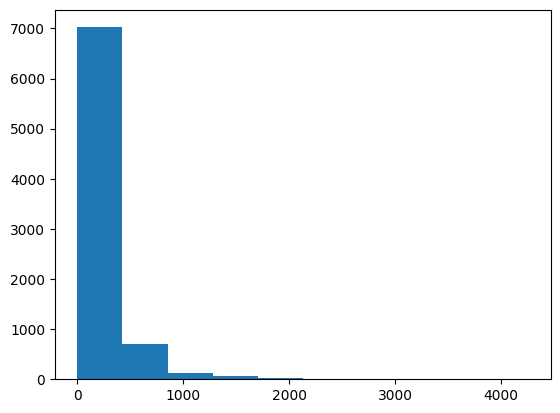

In [361]:
plt.hist(char_len);

In [362]:
np.percentile(char_len, 95)

672.8999999999996

In [363]:
avg_sent_len

231

In [364]:
chars = []
for sent in pd.DataFrame(train_chars)[0]:
  for w in sent.split():
    chars.append(w.lower())
len(set(chars))

265

In [365]:
VOCAB_CHARS_SIZE = len(set(chars))
OUT_CHAR_SEQ_LEN = 672

In [366]:
char_vectorizer = layers.TextVectorization(max_tokens=VOCAB_CHARS_SIZE,
                                           output_sequence_length=OUT_CHAR_SEQ_LEN,
                                           pad_to_max_tokens=True,
                                           name='char_vectorization_layer')

In [367]:
char_vectorizer.adapt(train_chars)

In [368]:
char_vocab = char_vectorizer.get_vocabulary()
print(f'5 Most common characters:{char_vocab[:5]}')
print(f'5 Least common characters:{char_vocab[-5:]}')

5 Most common characters:['', '[UNK]', 'e', 'a', 't']
5 Least common characters:['☕', '™', 'ģ', 'ú', 'è']


In [369]:
char_embedding_layer = layers.Embedding(input_dim=VOCAB_CHARS_SIZE,
                                        output_dim=20,
                                        mask_zero=True,
                                        input_length=OUT_CHAR_SEQ_LEN,
                                        name='char_embedding_layer')

#### Building Model_1 with Functional API

In [370]:
#setup token inputs/model
token_inputs = layers.Input(shape=(1,), dtype=tf.string, name='token_inputs')
token_vectorized = sentence_vectorizer(token_inputs)
token_embeddings = sentence_embedding(token_vectorized)
token_output = layers.Conv1D(64, 2, activation='relu')(token_embeddings)
token_output = layers.GlobalAveragePooling1D()(token_output)
token_model = tf.keras.Model(inputs=token_inputs,outputs=token_output, name='token_model')

#setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name='char_inputs')
char_vectorized = char_vectorizer(char_inputs)
char_embeddings = char_embedding_layer(char_vectorized)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,outputs=char_bi_lstm)

#concatenate char and token inputs
token_char_concat = layers.Concatenate(name='token_char')([token_model.output,char_model.output])

#creation of output layers
combined_dropout_layer = layers.Dropout(0.5)(token_char_concat)
combined_dense_layer = layers.Dense(64)(combined_dropout_layer)
final_combined_dropout_layer = layers.Dropout(0.5)(combined_dense_layer)
output_layer = layers.Dense(1, activation='sigmoid')(final_combined_dropout_layer)

#model construction with token and char inputs
model_1 = tf.keras.Model(inputs=[token_model.input,char_model.input],
                         outputs=output_layer, name='token_char_model')

In [371]:
## Visualize model_1 summary
model_1.summary()

Model: "token_char_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 token_inputs (InputLayer)   [(None, 1)]                  0         []                            
                                                                                                  
 sentence_vectorization_lay  (None, 148)                  0         ['token_inputs[0][0]']        
 er (TextVectorization)                                                                           
                                                                                                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 sentence_embedding_layer (  (None, 148, 128)             3543552   ['sentence_vect

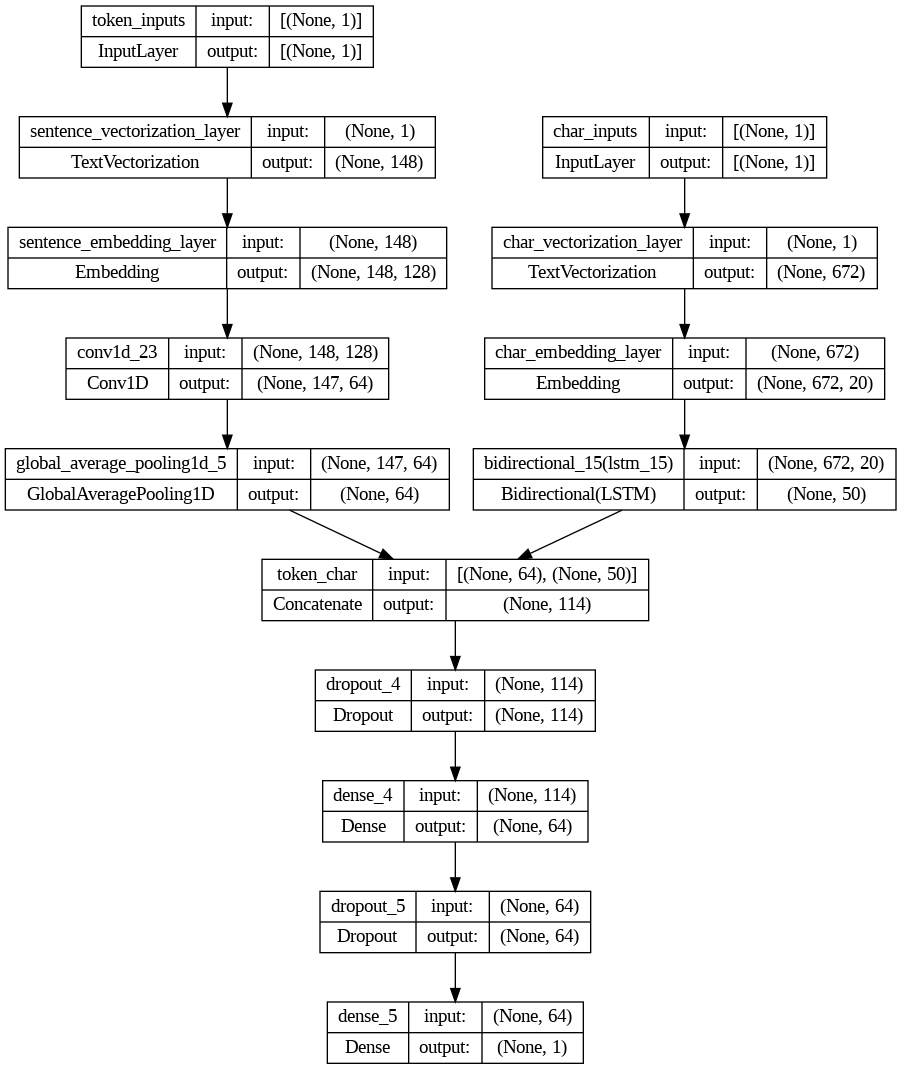

In [372]:
##plot model_1
plot_model(model_1,show_shapes=True)

In [373]:
## compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

#### Building sentence-char level datasets

In [374]:
train_sentences = Dataset.from_tensor_slices(X_train)
train_chars = Dataset.from_tensor_slices(train_chars)
test_sentences = Dataset.from_tensor_slices(X_test)
test_chars = Dataset.from_tensor_slices(test_chars)

In [375]:
train_data = Dataset.zip((train_sentences, train_chars))
test_data = Dataset.zip((test_sentences, test_chars))

In [376]:
train_labels = Dataset.from_tensor_slices(y_train_encoded)
test_labels = Dataset.from_tensor_slices(y_test_encoded)

In [377]:
train_dataset = Dataset.zip((train_data, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = Dataset.zip((test_data, test_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

## Fitting model 1 on sentence-char-level data

In [378]:
model_1_history = model_1.fit(train_dataset,epochs=3,
                              steps_per_epoch=len(train_dataset),
                              validation_data=test_dataset,
                              validation_steps=int(0.15*len(test_dataset)))

Epoch 1/3
249/249 [==============================] - 247s 949ms/step - loss: 0.3098 - accuracy: 0.8688 - val_loss: 0.2398 - val_accuracy: 0.9097
Epoch 2/3
249/249 [==============================] - 224s 898ms/step - loss: 0.1567 - accuracy: 0.9464 - val_loss: 0.2466 - val_accuracy: 0.8993
Epoch 3/3
249/249 [==============================] - 223s 895ms/step - loss: 0.1257 - accuracy: 0.9568 - val_loss: 0.2615 - val_accuracy: 0.9097


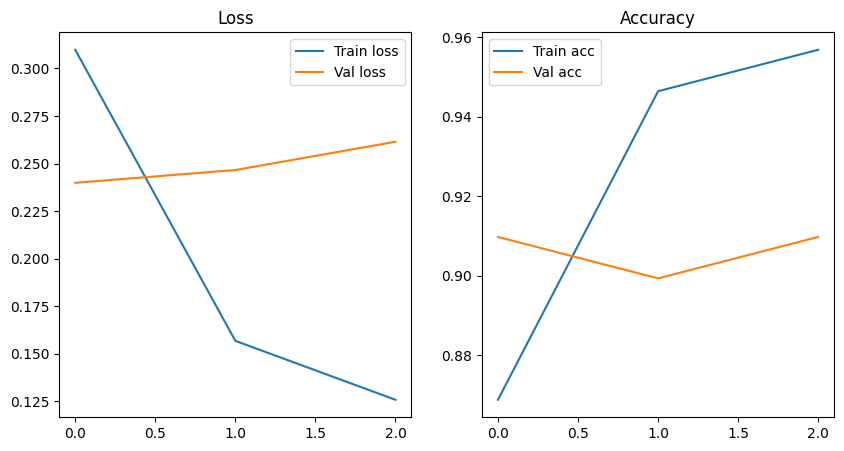

In [382]:
plot_loss_curves(model_1_history)

## Evaluating model 1

In [383]:
## making some predictions
y_pred_probs = model_1.predict(test_dataset)
y_pred = tf.squeeze(tf.round(y_pred_probs))

63/63 [==============================] - 17s 157ms/step


Accuracy_score:88.50%


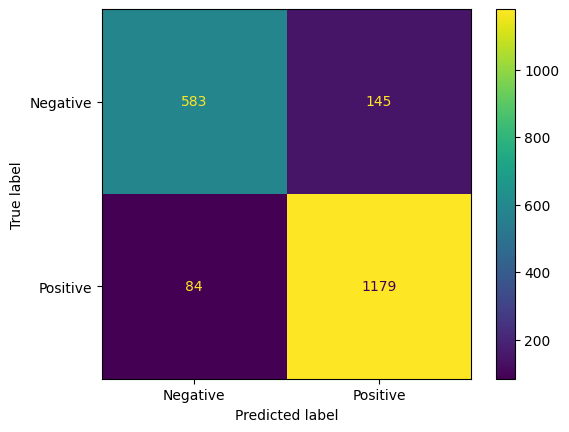

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       728
           1       0.89      0.93      0.91      1263

    accuracy                           0.88      1991
   macro avg       0.88      0.87      0.87      1991
weighted avg       0.88      0.88      0.88      1991



In [384]:
print(f'Accuracy_score:{accuracy_score(y_test_encoded,y_pred)*100:.2f}%')
cm = confusion_matrix(y_test_encoded,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['Negative','Positive'])
disp.plot()
plt.show()
print(classification_report(y_test_encoded, y_pred))